In [1]:
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "..")

from src.visualization.visualize import plot_original_and_augmented


In [13]:
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)
healthy_df = timeSeries[timeSeries['class'] == 'Healthy'].cop_x.values
neuropathic_df = timeSeries[timeSeries['class'] == 'Neuropathic'].cop_x.values
diabetic_df = timeSeries[timeSeries['class'] == 'Diabetic'].cop_x.values

In [14]:
import numpy as np

def augment_time_series_set_with_window_warping(X, window_size_ratio=0.1, scale_factors=[0.5, 1.5]):
    """
    Augmenta un conjunto de series de tiempo utilizando window warping.

    Parameters:
    X (list): Conjunto de series de tiempo originales.
    window_size_ratio (float): Ratio del tamaño de la ventana respecto a la longitud total de la serie de tiempo.
    scale_factors (list): Lista de factores de escala para seleccionar al azar.

    Returns:
    augmented_data (list): Conjunto de series de tiempo aumentadas.
    """
    # Inicializar lista para almacenar las series de tiempo aumentadas
    augmented_data = []
    
    # Iterar sobre cada serie de tiempo en el conjunto original
    for series in X:
        series_length = len(series)
        window_size = int(series_length * window_size_ratio)
        
        # Asegurar que la ventana tenga al menos un tamaño de 1
        window_size = max(window_size, 1)
        
        # Seleccionar una posición de inicio aleatoria para la ventana
        start_idx = np.random.randint(0, series_length - window_size + 1)
        
        # Seleccionar una escala aleatoria de la lista de factores de escala
        scale_factor = np.random.choice(scale_factors)
        
        # Aplicar window warping a la subsecuencia seleccionada
        window = series[start_idx:start_idx + window_size]
        warped_window = np.interp(
            np.linspace(0, window_size, int(window_size * scale_factor)),
            np.arange(window_size),
            window
        )
        
        # Crear una nueva serie de tiempo combinando la parte no deformada con la subsecuencia deformada
        augmented_series = np.concatenate([
            series[:start_idx],
            warped_window,
            series[start_idx + window_size:]
        ])
        
        # Asegurar que la serie de tiempo aumentada tenga la misma longitud que la original
        if len(augmented_series) > series_length:
            augmented_series = augmented_series[:series_length]
        elif len(augmented_series) < series_length:
            augmented_series = np.pad(augmented_series, (0, series_length - len(augmented_series)), 'constant')
        
        # Agregar la serie de tiempo aumentada a la lista
        augmented_data.append(augmented_series)
    
    return augmented_data

# Ejemplo de uso
# Supongamos que `data` es tu conjunto de series de tiempo
augmented_data_healthy = augment_time_series_set_with_window_warping(healthy_df)
augmented_data_diabetic = augment_time_series_set_with_window_warping(diabetic_df)
augmented_data_neuropathic = augment_time_series_set_with_window_warping(neuropathic_df)



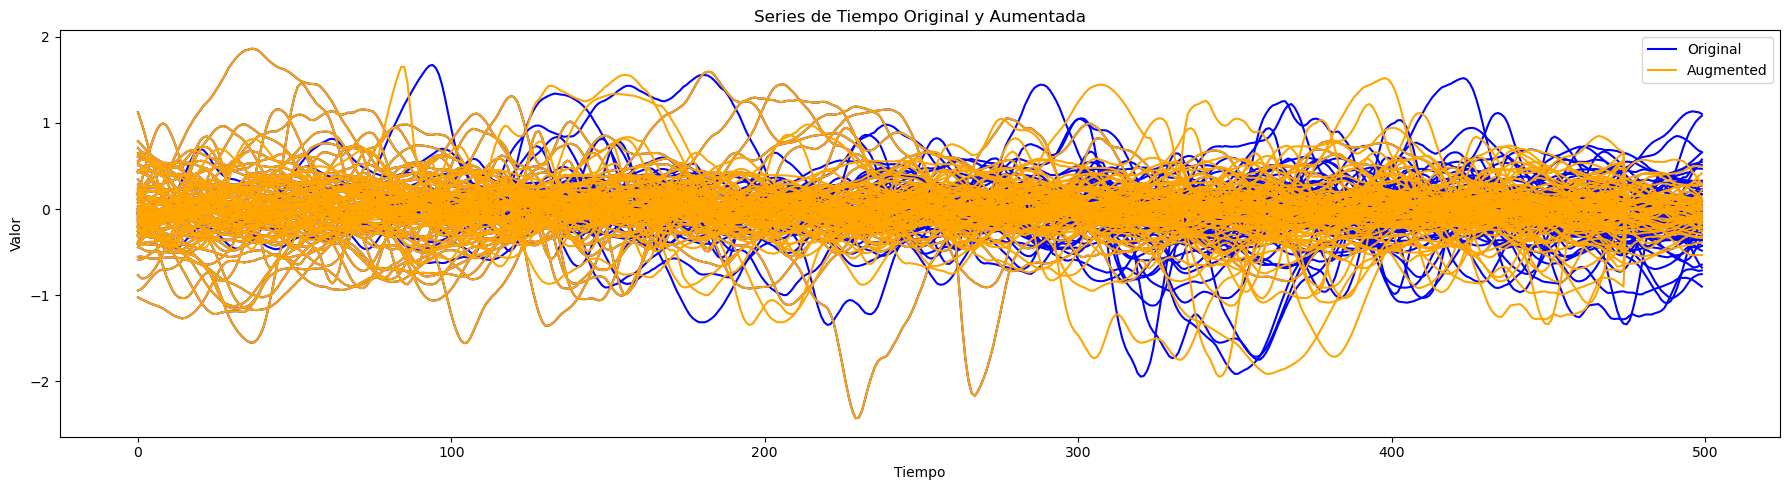

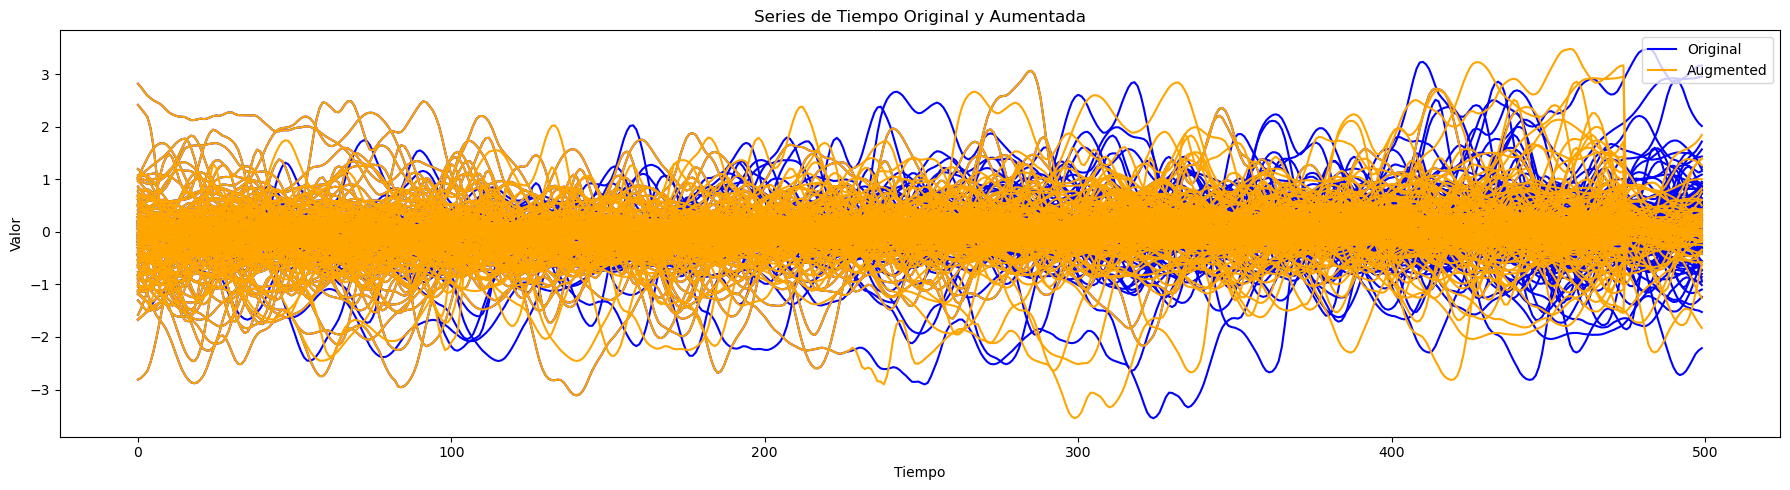

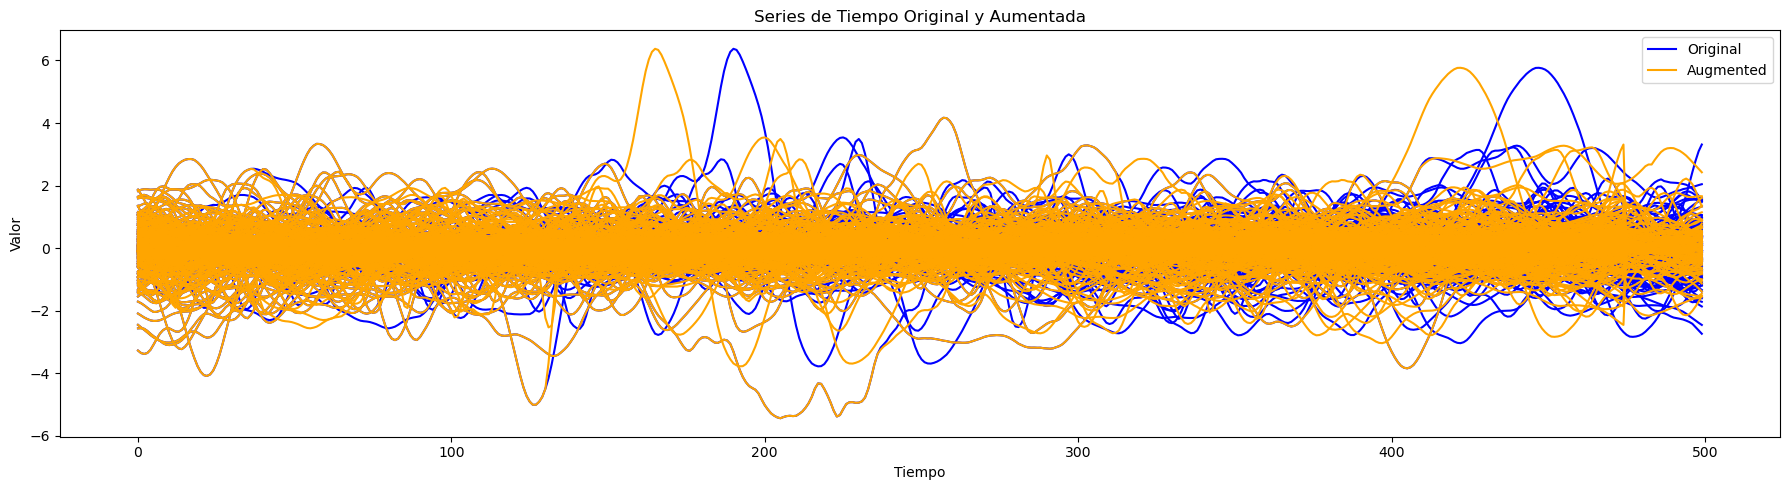

In [16]:
from src.visualization.visualize import plot_series
plot_series(healthy_df, augmented_data_healthy)
plot_series(diabetic_df, augmented_data_diabetic)
plot_series(neuropathic_df, augmented_data_neuropathic)
